In [3]:
DATA_DIR = "C:/Users/salva/PycharmProjects/Data/aibedo"  # the data used for prediction must be here, as well as the cmip6 mean/std statistics
fname = "CESM2.historical.r1i1p1f1.Input.Exp8_fixed.nc"

In [9]:
import xarray as xr
import torch
import matplotlib.pyplot as plt
ds = xr.open_dataset(f"{DATA_DIR}/{fname}", engine='netcdf4')

In [6]:
ds.crel.values.shape

(1980, 192, 288)

In [12]:
crel = torch.from_numpy(ds.crel.values)
ada_avg_pool = torch.nn.AdaptiveAvgPool2d((192, 224))
crel_out = ada_avg_pool(crel)
print(crel_out.shape)

torch.Size([1980, 192, 224])


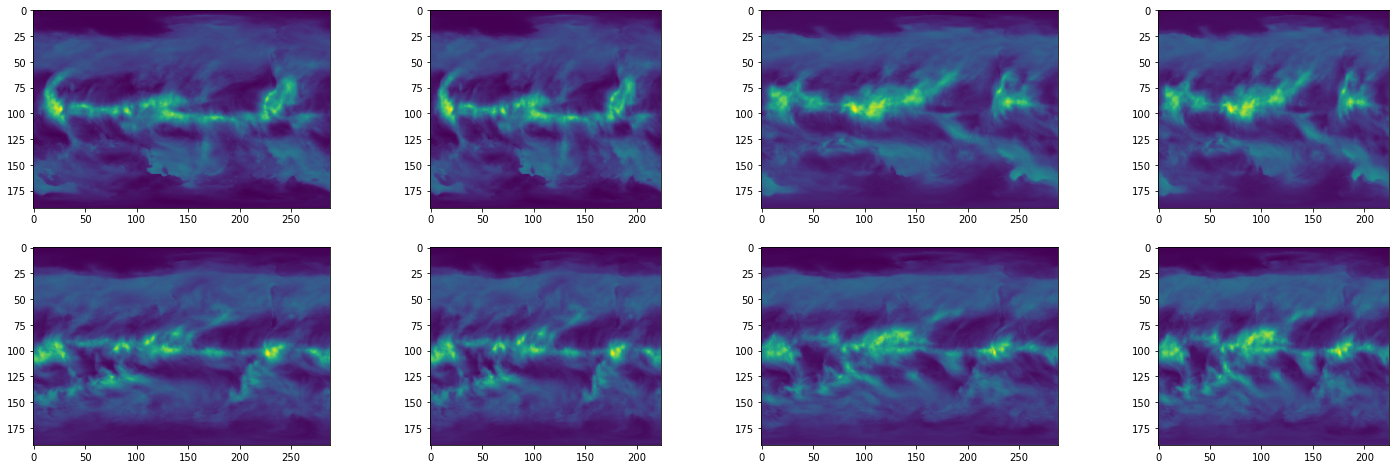

In [13]:
plt.rcParams['figure.figsize'] = [25, 8]  # general matplotlib parameters
fig, ax = plt.subplots(2, 4)
ax = ax.flat
for a, i in enumerate([10, 50, 100, 400]):
    ax[a*2].imshow(crel[i, ...])
    ax[a*2+1].imshow(crel_out[i, ...])